<center>
    <h1><font color="blue">L2 Multihit</font></h1>
</center>

## <font color="navy"> Imports

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import tracker_pipeline.conv_l2tol3_new as mh

## <font color="navy"> File Dictionaries

In [28]:
fdata_dict ={
    'ecal':'/Users/swasti/Downloads/EnergyCalibrationCoefficients_20220420.dat',
    'r1_L2':'/Users/swasti/code/test_temp/multi_hit/2022-04-25_1650913642_5MeVBeam_1hour_Tracker_L2.h5',
    }
fname = fdata_dict['r1_L2']
fname

'/Users/swasti/code/test_temp/multi_hit/2022-04-25_1650913642_5MeVBeam_1hour_Tracker_L2.h5'

# <font color="blue"> Read File

In [29]:
r1= h5py.File(fdata_dict['r1_L2'],'r')
#r1_new = h5py.File(fdata_dict['r1_L2_new'],'r')

In [31]:
fname = fdata_dict['r1_L2']
fpath = fname[0:fname.rfind('/')+1]
fpath

'/Users/swasti/code/test_temp/multi_hit/'

# <font color="blue"> Working with File

## <font color='navy'> File Keys and Info

In [36]:
r1['layer00/data'].keys()

<KeysViewHDF5 ['asic00', 'asic01', 'asic02', 'asic03', 'asic04', 'asic05', 'asic06', 'asic07', 'asic08', 'asic09', 'asic10', 'asic11', 'event_count', 'event_id', 'gps_pps_count', 'layer_number', 'live_time', 'packet_size', 'packet_tail', 'packet_type', 'pl_data_header', 'running_time', 'sync_index', 'system_time', 'tbd', 'time_since_last_pps_pulse', 'triggering_condition', 'vata_ro_ena']>

In [37]:
r1['layer00/data/sync_index']

<HDF5 dataset "sync_index": shape (388646,), type "<i8">

In [38]:
r1['layer00/data/event_id']

<HDF5 dataset "event_id": shape (554237,), type "<u4">

In [39]:
r1['layer00/vdata'].keys()

<KeysViewHDF5 ['calib_data', 'channel_cm_sub', 'channel_data', 'nrg', 'sig_arr']>

In [40]:
r1['layer00/vdata/calib_data']

<HDF5 dataset "calib_data": shape (47911, 5), type "<f8">

In [41]:
r1['layer00/vdata/nrg']

<HDF5 dataset "nrg": shape (554237, 2, 192), type "<f8">

# <font color='blue'> Layer 0

## <font color='navy'> Sync Indexed the data

In [42]:
sync_index = r1['layer00/data/sync_index'][...]
nrg = r1['layer00/vdata/nrg'][...][sync_index]

In [43]:
nrg.shape

(388646, 2, 192)

## <font color='navy'> Stats
> <font color='red'> Comparing  no. of hits on side a and side b

In [44]:
sideA_count = []
sideB_count = []

for i in range(nrg.shape[0]):
    t_arr = nrg[i,0,:]
    no_count = np.count_nonzero(t_arr>0.0)
    sideA_count.append(no_count)

for i in range(nrg.shape[0]):
    t_arr1 = nrg[i,1,:]
    no_count = np.count_nonzero(t_arr1>0.0)
    sideB_count.append(no_count)

In [45]:
max(sideA_count)

22

### <font color='brown'> Plot: Side A, no of hits.

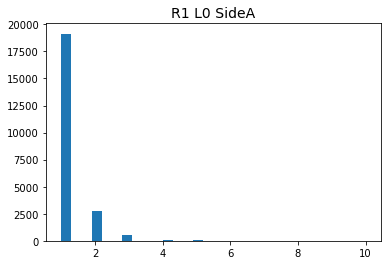

In [20]:
a,b,c= plt.hist(sideA_count, bins=30, range=[1,10])
plt.title("R1 L0 SideA",size=14)
plt.savefig(f"{fpath}R1-L0-SideA_hist.jpeg")

### <font color='brown'> Plot: Side B, no of hits.

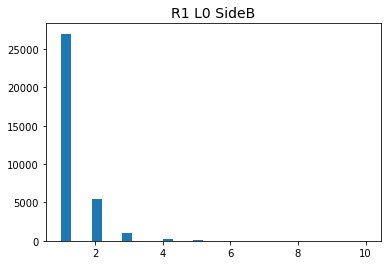

In [46]:
a1,b1,c1= plt.hist(sideB_count, bins=30, range=[1,10])
plt.title("R1 L0 SideB", size=14)
plt.savefig(f"{fpath}R1-L0-SideB_hist.jpeg")

### Additional Filter

In [22]:
print(nrg.shape)
NOVALID = 0
VALID = 0
A0B1 = 0
A1B0 = 0

for i in range(nrg.shape[0]):
    t_arr_a = nrg[i,0,:]
    t_arr_b = nrg[i,1,:]
    ncnt_a = np.count_nonzero(t_arr_a >0.0)
    ncnt_b = np.count_nonzero(t_arr_b >0.0)
    
    if ncnt_a == 0 or ncnt_b == 0:
        NOVALID+=1
    else:
        VALID+=1

(388646, 2, 192)


### <font color='brown'> Plot: Pie Chart 1

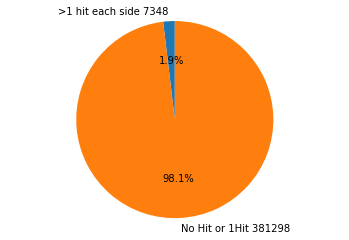

In [23]:
# 1st Pie
labels = f'>1 hit each side {VALID}', f'No Hit or 1Hit {NOVALID}'
sizes = [VALID, NOVALID]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f"{fpath}L0-Pie1.jpeg")

In [24]:
nrg.shape


#-- Not used but still needed.
Invalid = 0

A1B1 = 0

A2B1 = 0
A1B2 = 0
A2B2 = 0

A3B2 = 0
A2B3 = 0
A3B3 = 0
A1B3 = 0
A3B1 = 0

other_1 = 0
Other = 0
for i in range(nrg.shape[0]):
    t_arr_a = nrg[i,0,:]
    t_arr_b = nrg[i,1,:]
    ncnt_a = np.count_nonzero(t_arr_a >0.0)
    ncnt_b = np.count_nonzero(t_arr_b >0.0)
    
    if ncnt_a == 0 or ncnt_b ==0:
        Invalid+=1
    elif ncnt_a == 1 and ncnt_b == 1: 
        A1B1 +=1
    elif ncnt_a == 2 and ncnt_b == 1: 
        A2B1 +=1
    elif ncnt_a == 1 and ncnt_b == 2: 
        A1B2 +=1
    elif ncnt_a == 2 and ncnt_b == 2: 
        A2B2 +=1
    elif ncnt_a == 3 and ncnt_b == 2: 
        A3B2 +=1
    elif ncnt_a == 2 and ncnt_b == 3: 
        A2B3 +=1
    elif ncnt_a == 3 and ncnt_b == 3: 
        A3B3 +=1
    elif ncnt_a == 1 and ncnt_b == 3: 
        A1B3 +=1   
    elif ncnt_a == 3 and ncnt_b == 1: 
        A3B1 +=1
    else:
        Other+=1

A1B1, A2B1, A1B2, A2B2, A3B2, A2B3, A3B3, A1B3, A3B1, Other, other_1

(3994, 861, 1022, 470, 139, 152, 73, 174, 158, 305, 0)

### <font color='brown'> Plot: Pie Chart 2

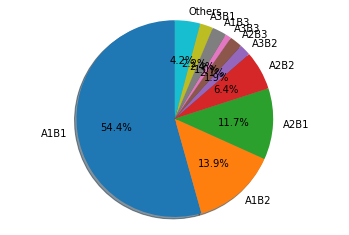

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A1B1', 'A1B2', 'A2B1', 'A2B2', 'A3B2', 'A2B3', 'A3B3','A1B3','A3B1','Others'
sizes = [A1B1, A1B2, A2B1, A2B2, A3B2, A2B3, A3B3, A1B3,A3B1,Other]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig(f"{fpath}L0-Pie2.jpeg")


### <font color='brown'> Plot: Pie Chart 3

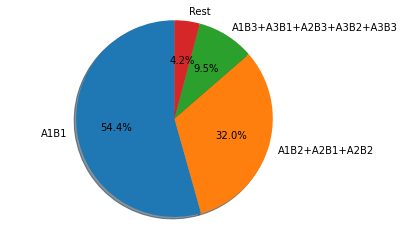

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A1B1', 'A1B2+A2B1+A2B2','A1B3+A3B1+A2B3+A3B2+A3B3', 'Rest'
sizes = [A1B1, A1B2+A2B1+A2B2, A3B2+A2B3+A3B3+A1B3+A3B1,Other]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig(f"{fpath}L0-Pie3.jpeg")

#plt.show()

In [49]:
54.4 + 32.0

86.4

# <font color='blue'> Layer1

## <font color='navy'>Sync Index the data

In [63]:
sync_index = r1['layer01/data/sync_index'][...]
nrg = r1['layer01/vdata/nrg'][...][sync_index]

In [64]:
sideA_count = []
sideB_count = []

for i in range(nrg.shape[0]):
    t_arr = nrg[i,0,:]
    no_count = np.count_nonzero(t_arr>0.0)
    sideA_count.append(no_count)

for i in range(nrg.shape[0]):
    t_arr1 = nrg[i,1,:]
    no_count = np.count_nonzero(t_arr1>0.0)
    sideB_count.append(no_count)

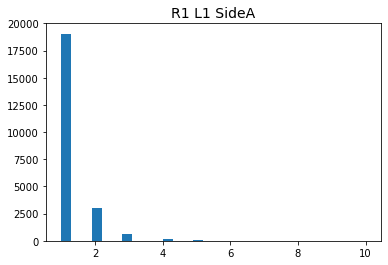

In [65]:
a,b,c= plt.hist(sideA_count, bins=30, range=[1,10])
plt.title("R1 L1 SideA",size=14)
plt.savefig(f"{fpath}R1-L1-SideA_hist.jpeg")

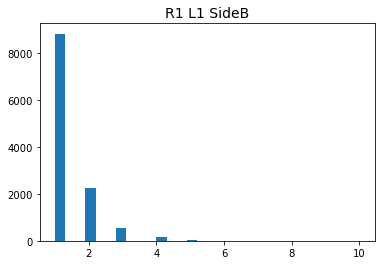

In [66]:
a1,b1,c1= plt.hist(sideB_count, bins=30, range=[1,10])
plt.title("R1 L1 SideB", size=14)
plt.savefig(f"{fpath}R1-L1-SideB_hist.jpeg")

In [67]:
print(nrg.shape)
NOVALID = 0
VALID = 0
A0B1 = 0
A1B0 = 0

for i in range(nrg.shape[0]):
    t_arr_a = nrg[i,0,:]
    t_arr_b = nrg[i,1,:]
    ncnt_a = np.count_nonzero(t_arr_a >0.0)
    ncnt_b = np.count_nonzero(t_arr_b >0.0)
    
    if ncnt_a == 0 or ncnt_b == 0:
        NOVALID+=1
    else:
        VALID+=1
    

(388646, 2, 192)


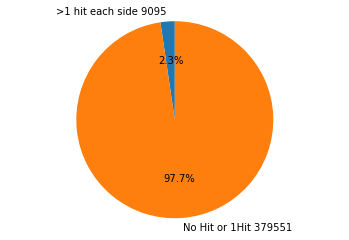

In [68]:
# 1st Pie
labels = f'>1 hit each side {VALID}', f'No Hit or 1Hit {NOVALID}'
sizes = [VALID, NOVALID]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f"{fpath}L1-Pie1.jpeg")

In [69]:
nrg.shape


#-- Not used but still needed.
Invalid = 0

A1B1 = 0

A2B1 = 0
A1B2 = 0
A2B2 = 0

A3B2 = 0
A2B3 = 0
A3B3 = 0
A1B3 = 0
A3B1 = 0

other_1 = 0
Other = 0
for i in range(nrg.shape[0]):
    t_arr_a = nrg[i,0,:]
    t_arr_b = nrg[i,1,:]
    ncnt_a = np.count_nonzero(t_arr_a >0.0)
    ncnt_b = np.count_nonzero(t_arr_b >0.0)
    
    if ncnt_a == 0 or ncnt_b ==0:
        Invalid+=1
    elif ncnt_a == 1 and ncnt_b == 1: 
        A1B1 +=1
    elif ncnt_a == 2 and ncnt_b == 1: 
        A2B1 +=1
    elif ncnt_a == 1 and ncnt_b == 2: 
        A1B2 +=1
    elif ncnt_a == 2 and ncnt_b == 2: 
        A2B2 +=1
    elif ncnt_a == 3 and ncnt_b == 2: 
        A3B2 +=1
    elif ncnt_a == 2 and ncnt_b == 3: 
        A2B3 +=1
    elif ncnt_a == 3 and ncnt_b == 3: 
        A3B3 +=1
    elif ncnt_a == 1 and ncnt_b == 3: 
        A1B3 +=1   
    elif ncnt_a == 3 and ncnt_b == 1: 
        A3B1 +=1
    else:
        Other+=1

A1B1, A2B1, A1B2, A2B2, A3B2, A2B3, A3B3, A1B3, A3B1, Other, other_1

(5227, 1140, 939, 729, 239, 198, 131, 63, 93, 336, 0)

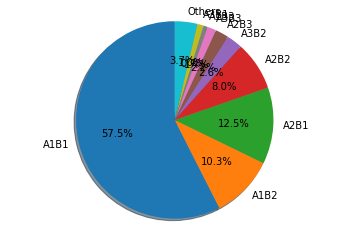

In [70]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A1B1', 'A1B2', 'A2B1', 'A2B2', 'A3B2', 'A2B3', 'A3B3','A1B3','A3B1','Others'
sizes = [A1B1, A1B2, A2B1, A2B2, A3B2, A2B3, A3B3, A1B3,A3B1,Other]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig(f"{fpath}L1-Pie2.jpeg")


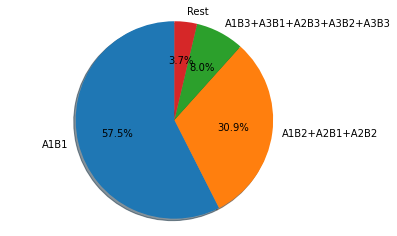

In [71]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A1B1', 'A1B2+A2B1+A2B2','A1B3+A3B1+A2B3+A3B2+A3B3', 'Rest'
sizes = [A1B1, A1B2+A2B1+A2B2, A3B2+A2B3+A3B3+A1B3+A3B1,Other]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig(f"{fpath}L1-Pie3.jpeg")

### Other Check

In [72]:
# nrg = r1_new['layer00/vdata/nrg']
nrg.shape


#-- Not used but still needed.
Invalid = 0
A0B1 = 0
A1B0 = 0

A1 =0
A1a = 0

A1B1 = 0
A1BM = 0
AMB1 = 0
AMBM = 0


A2B1 = 0
A1B2 = 0
A2B2 = 0

A3B2 = 0
A2B3 = 0
A3B3 = 0
A1B3 = 0
A3B1 = 0

other_1 = 0
Other = 0
for i in range(nrg.shape[0]):
    t_arr_a = nrg[i,0,:]
    t_arr_b = nrg[i,1,:]
    ncnt_a = np.count_nonzero(t_arr_a >0.0)
    ncnt_b = np.count_nonzero(t_arr_b >0.0)
    
    if ncnt_a == 0 or ncnt_b ==0:
        Invalid+=1
    elif ncnt_a == 1 and ncnt_b == 0:
        A0B1 +=1
    elif ncnt_a == 0 and ncnt_b == 1: 
        A1B0 +=1
#    elif ncnt_a == 1 and ncnt_b == 1: 
#        A1B1 +=1
#    elif ncnt_a == 1 and ncnt_b >1:
#        A1BM+=1
#    elif ncnt_a > 1 and ncnt_b == 1:
#        AMB1+=1
    elif ncnt_a >=1 and ncnt_b>=1:
        AMBM+=1
    else:
        print(ncnt_a, ncnt_b)
        Other+=1

In [73]:
A1B1, Other,A1, A1a, A1BM, AMB1, AMBM

(0, 0, 0, 0, 0, 0, 9095)

In [74]:
tot = nrg.shape[0]
nohit = NOVALID
SingleHit = A0B1+A1B0
OneEach = A1B1
Rest = Other

totvalid = tot-nohit-SingleHit
print(totvalid)
nohit+SingleHit+OneEach+Rest

9095


379551

In [75]:
totvalid-A1B1-A1BM-AMBM


0

## Checking old vs new calib_data

In [47]:
r1_new['layer00/vdata'].keys()

<KeysViewHDF5 ['calib_data', 'channel_cm_sub', 'channel_data', 'nrg', 'sig_arr']>

In [48]:
o_nrg = r1_new['layer00/vdata/calib_data']
o_nrg.shape

(47911, 5)

## Sig arr

In [61]:
sig_arr = r1_new['layer00/vdata/sig_arr'][...]
side1 = sig_arr[:,0,:]
side2 = sig_arr[:,1,:]

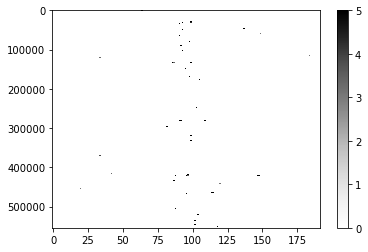

In [73]:
plt.imshow(side1,cmap='Greys', interpolation='nearest',vmax=5)
plt.axis('auto')
plt.colorbar()

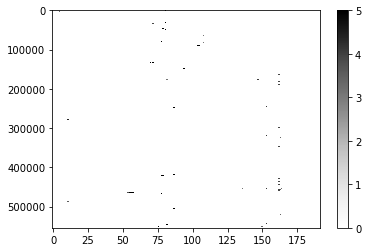

In [74]:
plt.imshow(side2,cmap='Greys', interpolation='nearest',vmax=5)
plt.axis('auto')
plt.colorbar()